In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
product = {
    'month': [1,2,3,4,5,6,7,8,9,10,11,12],
    'demand': [290,260,288,300,310,303,329,340,316,330,308,310]
}

In [3]:
df = pd.DataFrame(product)
df.head()

,month,demand
0,1,290
1,2,260
2,3,288
3,4,300
4,5,310


In [4]:
for i in range(0, df.shape[0]-2):
    df.loc[df.index[i+2], 'SMA_3'] = \
    np.round(((df.iloc[i,1] + df.iloc[i+1,1] + df.iloc[i+2,1])/3),1)
df.head()

,month,demand,SMA_3
0,1,290,NaN
1,2,260,NaN
2,3,288,279.3
3,4,300,282.7
4,5,310,299.3


In [5]:
df['pandas_SMA_3'] = df.iloc[:,1].rolling(window=3).mean()
df.head()

,month,demand,SMA_3,pandas_SMA_3
0,1,290,NaN,NaN
1,2,260,NaN,NaN
2,3,288,279.3,279.333333
3,4,300,282.7,282.666667
4,5,310,299.3,299.333333


In [6]:
for i in range(0, df.shape[0]-3):
    df.loc[df.index[i+3], 'SMA_4'] = \
    np.round(((df.iloc[i,1] + df.iloc[i+1,1] + df.iloc[i+2,1] + df.iloc[i+3,1])/4),1)
df.head()

,month,demand,SMA_3,pandas_SMA_3,SMA_4
0,1,290,NaN,NaN,NaN
1,2,260,NaN,NaN,NaN
2,3,288,279.3,279.333333,NaN
3,4,300,282.7,282.666667,284.5
4,5,310,299.3,299.333333,289.5


In [7]:
df['pandas_SMA_4'] = df.iloc[:,1].rolling(window=4).mean()
df.head()

,month,demand,SMA_3,pandas_SMA_3,SMA_4,pandas_SMA_4
0,1,290,NaN,NaN,NaN,NaN
1,2,260,NaN,NaN,NaN,NaN
2,3,288,279.3,279.333333,NaN,NaN
3,4,300,282.7,282.666667,284.5,284.5
4,5,310,299.3,299.333333,289.5,289.5


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

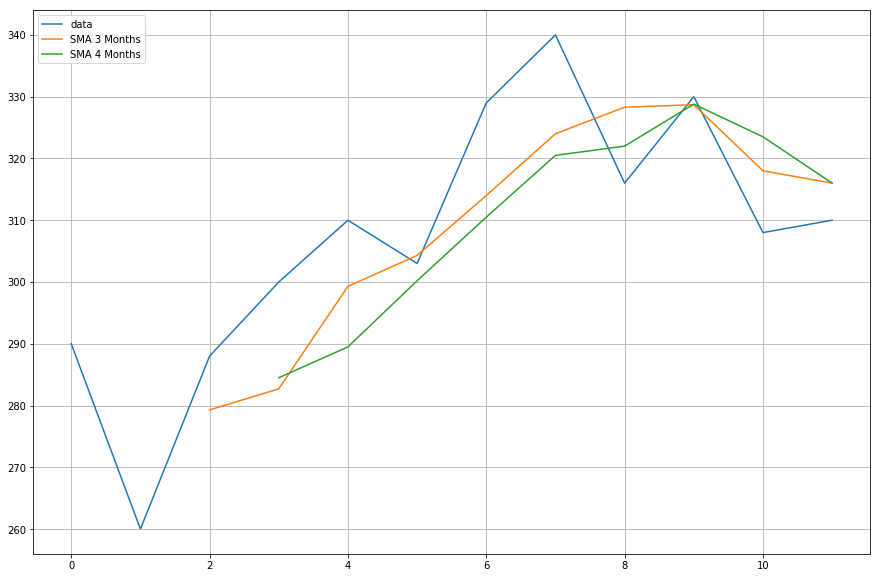

In [9]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df['demand'], label='data')
plt.plot(df['SMA_3'], label='SMA 3 Months')
plt.plot(df['SMA_4'], label='SMA 4 Months')
plt.legend(loc=2);

<br><br>

In [10]:
df = pd.read_csv('AirQualityUCI.csv', sep=';', decimal=',')
df = df.iloc[:, 0:14]
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6


In [11]:
df.isna().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
dtype: int64

In [12]:
df.dropna(inplace=True)
df.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
dtype: int64

In [13]:
df_T = pd.DataFrame(df.iloc[:, -2])
df_T.head()

,T
0,13.6
1,13.3
2,11.9
3,11.0
4,11.2


In [14]:
df_T['CMA_4'] = df_T.expanding(min_periods=4).mean()
df_T.head(10)

,T,CMA_4
0,13.6,NaN
1,13.3,NaN
2,11.9,NaN
3,11.0,12.450000
4,11.2,12.200000
5,11.2,12.033333
6,11.3,11.928571
7,10.7,11.775000
8,10.7,11.655556
9,10.3,11.520000


In [15]:
import datetime

In [16]:
df['DateTime'] = (df.Date) + ' ' + (df.Time)
df.DateTime = \
df.DateTime.apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y %H.%M.%S'))

In [17]:
df_T.index = df.DateTime

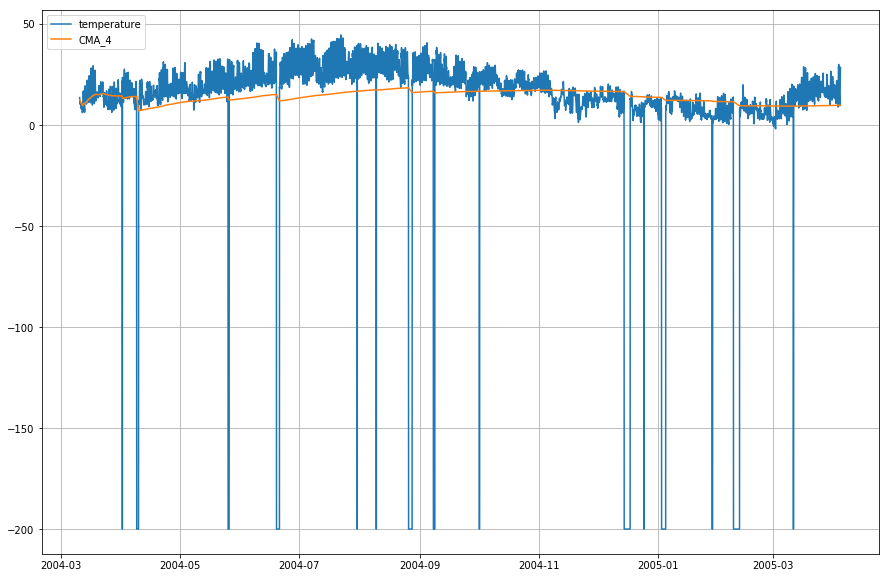

In [18]:
plt.figure(figsize=(15, 10))
plt.grid(True)
plt.plot(df_T['T'], label='temperature')
plt.plot(df_T['CMA_4'], label='CMA_4')
plt.legend(loc=2);

In [19]:
df_T['EMA'] = df_T.iloc[:,0].ewm(span=40, adjust=False).mean()
df_T.head()

,T,CMA_4,EMA
DateTime,,,
2004-03-10 18:00:00,13.6,NaN,13.600000
2004-03-10 19:00:00,13.3,NaN,13.585366
2004-03-10 20:00:00,11.9,NaN,13.503153
2004-03-10 21:00:00,11.0,12.45,13.381048
2004-03-10 22:00:00,11.2,12.20,13.274655


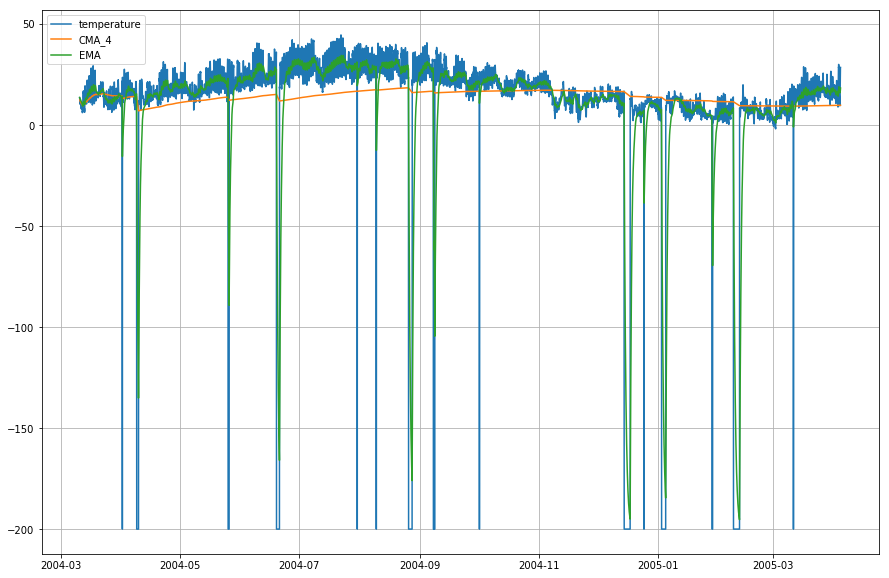

In [20]:
plt.figure(figsize=(15, 10))
plt.grid(True)
plt.plot(df_T['T'], label='temperature')
plt.plot(df_T['CMA_4'], label='CMA_4')
plt.plot(df_T['EMA'], label='EMA')
plt.legend(loc=2);